In [1]:
import FuncionRequisicion as rq
import FuncionReporte as rp
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pathlib import Path
from docxtpl import DocxTemplate, InlineImage
import datetime
from statistics import mean
import uuid
from datetime import datetime
import nltk
import json
import tflearn
import pickle
import telebot
from nltk.stem.lancaster import LancasterStemmer
stemmer=LancasterStemmer()
import random
from telebot.types import ReplyKeyboardMarkup
from telebot.types import ForceReply
from Token import *


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
#Guardamos nuestro dataset en una variable
envio = pd.read_csv('delivery_dataset.csv', sep=';')
envioReal = envio.copy()

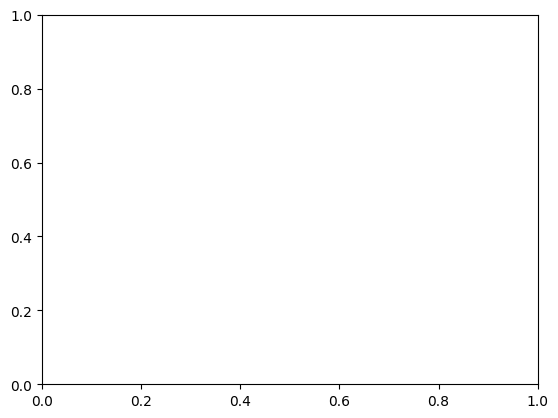

In [3]:
rp.crearReporte()

In [4]:
# Eliminamos los datos nulos y los cambiamos por valores útiles.
lista_index=[]
lista_value=[]
for x, i in enumerate(envioReal["Actual_Shipment_Time"].isna()):
    if i == True:
        lista_index.append(x)
        lista_value.append(i)

for i in lista_index:
    envioReal["Actual_Shipment_Time"][i] = envioReal["Planned_Shipment_Time"][i]

lista_index=[]
lista_value=[]
for x, i in enumerate(envioReal["Shipment_Delay"].isna()):
    if i == True:
        lista_index.append(x)
        lista_value.append(i)

for i in lista_index:
    envioReal["Shipment_Delay"][i] = 0

lista_index=[]
lista_value=[]
for x, i in enumerate(envioReal["Delivery_Status"].isna()):
    if i == True:
        lista_index.append(x)
        lista_value.append(i)

for i in lista_index:
    envioReal["Delivery_Status"][i] = 1

C:\Users\yulu1\AppData\Local\Temp\ipykernel_18732\2394921274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  envioReal["Actual_Shipment_Time"][i] = envioReal["Planned_Shipment_Time"][i]
C:\Users\yulu1\AppData\Local\Temp\ipykernel_18732\2394921274.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  envioReal["Shipment_Delay"][i] = 0
C:\Users\yulu1\AppData\Local\Temp\ipykernel_18732\2394921274.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [5]:
sources1 = envioReal[ envioReal['Source'] == 'LAS'  ]
sources2 = envioReal[ envioReal['Source'] == 'MDW'  ]
sources3 = envioReal[ envioReal['Source'] == 'PHX'  ]
sources4 = envioReal[ envioReal['Source'] == 'OAK'  ]
sources5 = envioReal[ envioReal['Source'] == 'HOU'  ]

destination1 = envioReal[ envioReal['Destination'] == 'LAS'  ]
destination2 = envioReal[ envioReal['Destination'] == 'MDW'  ]
destination3 = envioReal[ envioReal['Destination'] == 'PHX'  ]
destination4 = envioReal[ envioReal['Destination'] == 'OAK'  ]
destination5 = envioReal[ envioReal['Destination'] == 'BWI'  ]

#Creamos dos datasets de solamente los 5 paises donde más se mandan pedidos y se reciben
sources = pd.concat( [ sources1, sources2, sources3, sources4, sources5 ] )
destination = pd.concat([ destination1, destination2, destination3, destination4, destination5 ])


#Calculamos el promedio de cada uno de los source que seleccionamos
dfSour = envioReal[envioReal['Source']=='LAX']
dfLAS = dfSour[dfSour['Destination']=='LAS']
dfMDW = dfSour[dfSour['Destination']=='MDW']
dfPHX = dfSour[dfSour['Destination']=='PHX']
dfOAK = dfSour[dfSour['Destination']=='OAK']
dfHOU = dfSour[dfSour['Destination']=='HOU']

dest = pd.concat([dfLAS, dfMDW, dfPHX, dfOAK, dfHOU])

destt=['Source', 'Destination', 'Carrier_Name', 'Planned_Delivery_Time', 'Distance']

envioc=dest.loc[:,destt]

Las = envioc[ envioc['Destination'] == 'LAS' ].mean()
Mdw = envioc[ envioc['Destination'] == 'MDW' ].mean()
Phx = envioc[ envioc['Destination'] == 'PHX' ].mean()
Oak = envioc[ envioc['Destination'] == 'OAK' ].mean()
Hou = envioc[ envioc['Destination'] == 'HOU' ].mean()

PLas =int(Las['Planned_Delivery_Time'].mean())
PMdw =int(Phx['Planned_Delivery_Time'].mean())
PPhx =int(Mdw['Planned_Delivery_Time'].mean())
POak =int(Oak['Planned_Delivery_Time'].mean())
PHou =int(Hou['Planned_Delivery_Time'].mean())

#DataFrame de envios para las cotizaciones, en las cuales se guarda el promedio del tiempo de delivery.

deliveryProm=pd.DataFrame({'Source': ['LAX', 'LAX', 'LAX', 'LAX', 'LAX'], 
           'Destination': ['LAS', 'MDW', 'PHX', 'OAK', 'HOU'],
           'Carrier_name': ['WN', 'WN', 'WN', 'WN', 'WN'],
           'Planned_Delivery_Time': [PLas, PMdw, PPhx, POak, PHou],
           'Distance': [236, 1750, 370, 337, 1390]},
            columns = ['Source', 'Destination', 'Carrier_name', 'Planned_Delivery_Time', 'Distance'])


C:\Users\yulu1\AppData\Local\Temp\ipykernel_18732\740797470.py:32: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Las = envioc[ envioc['Destination'] == 'LAS' ].mean()
C:\Users\yulu1\AppData\Local\Temp\ipykernel_18732\740797470.py:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mdw = envioc[ envioc['Destination'] == 'MDW' ].mean()
C:\Users\yulu1\AppData\Local\Temp\ipykernel_18732\740797470.py:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In add

In [6]:
#Función para crear el formar de la fecha
def current_date_format(date):
    day = date.day
    month = date.month
    year = date.year
    messsage = "{}-{} del {}".format(day, month, year)

    return messsage

In [7]:
#Guardamos nuestro dataset de productos
productos = pd.read_excel('productos.xlsx')
productos.set_index('product')
productosTienda = list(productos['product'])

def hacerPedido( nombre, cantidad, destino ):
    if nombre in productosTienda:
        productos.loc[ productos['product'] == nombre, 'stock' ] = productos.loc[ productos['product'] == nombre, 'stock' ] - 1
        productos.to_excel('productos.xlsx', engine='openpyxl', index=False)


In [8]:
#Creación de datos para el reporte y las gráficas

deliveryDelay = envioReal['Shipment_Delay'].mean() 
productTotal = len(envioReal)
pedidosPerdidos = envio['Actual_Shipment_Time'].isna().sum()


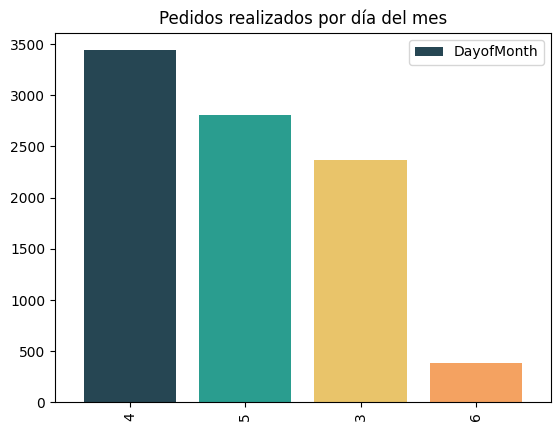

In [9]:
colores = ['#264653','#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
envioReal['DayofMonth'].value_counts().plot( kind = 'bar', width= 0.8, color = colores, title='Pedidos realizados por día del mes', legend=True)
plt.savefig('grafica1.jpg')


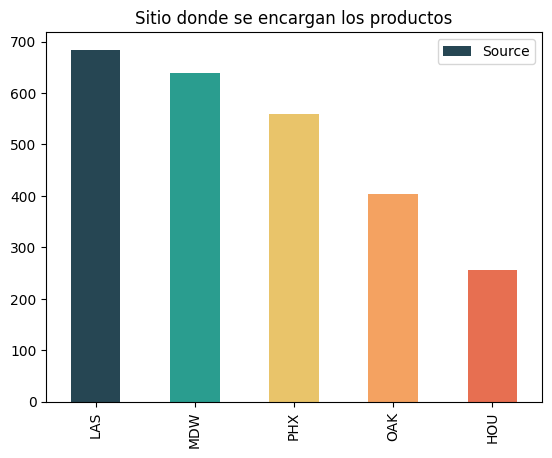

In [10]:
colores = ['#264653','#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
sources['Source'].value_counts().plot( kind = 'bar', color = colores, legend=True, title='Sitio donde se encargan los productos')

plt.savefig('grafica2.jpg')

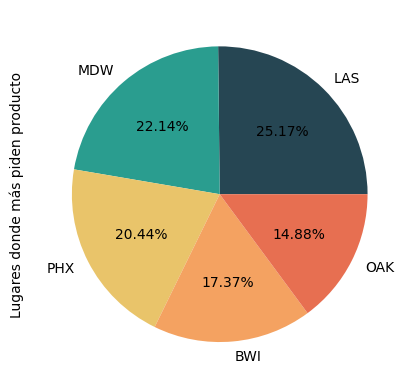

In [11]:
colores = ['#264653','#2A9D8F','#E9C46A', '#F4A261', '#E76F51',]
destination['Destination'].value_counts().plot.pie( autopct = "%.2f%%", colors = colores, ylabel="Lugares donde más piden producto" )

plt.savefig('grafica3.jpg')


----------------------------- BOT ---------------------------

In [12]:
with open("Frases.json", encoding='utf-8') as files:
    frases=json.load(files)

try:
    with open("Variables.pickle","rb") as archivoPickle_nuevo:
        palabras_a_usar, etiquetas, train, output = pickle.load(archivoPickle_nuevo)  

except:
    palabras_a_usar=[]
    etiquetas=[]
    auxX=[]
    auxY=[]


    nltk.download('punkt')



    for content in frases["contenido"]:
        for patrones in content["patrones"]:
                auxPalabra=nltk.word_tokenize(patrones)
                palabras_a_usar.extend(auxPalabra)
                auxX.append(auxPalabra)
                auxY.append(content["tag"])
                if content["tag"] not in etiquetas:
                    etiquetas.append(content["tag"])


    palabras_a_usar=[stemmer.stem(w.lower()) for w in palabras_a_usar if w!= "?"]

    palabras_a_usar=sorted(list(set(palabras_a_usar)))
    etiquetas=sorted(etiquetas)

    train=[]
    output=[]
    salidaVacia=[0 for _ in range(len(etiquetas))]




    for x, documento in enumerate(auxX):
            cubeta=[]
            auxPalabra=[stemmer.stem(w.lower()) for w in documento]
            for w in palabras_a_usar:
                if w in auxPalabra:
                    cubeta.append(1)
                else:
                    cubeta.append(0)
            filasalida=salidaVacia[:]
            filasalida[etiquetas.index(auxY[x])]=1
            train.append(cubeta)
            output.append(filasalida)
            


    train=np.array(train)
    output=np.array(output)
    with open("variables_nuevas.pickle", "wb") as archivoPickle:
        pickle.dump((palabras_a_usar, etiquetas,train, output ), archivoPickle )

In [13]:
red=tflearn.input_data(shape=[None,len(train[0])])
red=tflearn.fully_connected(red, len(output))
red=tflearn.fully_connected(red,len(output))
red=tflearn.fully_connected(red,len(output[0]), activation="softmax") 
red=tflearn.regression(red)

modelo=tflearn.DNN(red)
try:
     modelo.load("modelo_bot.tflearn")

except:
    
     modelo.fit(train, output, n_epoch=1000, batch_size=len(output), show_metric=True)
     modelo.save("modelo_bot.tflearn")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Restoring parameters from c:\Users\yulu1\Documents\HackatonS\modelo_bot.tflearn


In [14]:
#Variables globales
doc=open("Cotizacion.docx", "rb")
reporte = open("Reporte_Mensual_Enero.docx", "rb")
excelP = open("productos.xlsx", "rb")
dataset = open("delivery_dataset.csv", "rb")
usuario = False
name_lastname=[]
producto_name=[]
num=[]

In [15]:
#Creación del bot
bot=telebot.TeleBot(Token) 

In [16]:
#Comandos de usuario
@bot.message_handler(commands=["admin"])
def cmd_admin(message):
     
     markup=ForceReply()
     mensaje=bot.send_message(message.chat.id, "Ingrese su nombre de administrador", reply_markup=markup)
     
     bot.register_next_step_handler(mensaje, is_admin)

def is_admin(message): #Funcion reservada para admins 
    global usuario
    with open("Usuarios.json", "r+") as File:
            File=json.load(File)

    if [message.text] in File["usuarios"]["Users"]:
          bot.send_message(message.chat.id, "Usuario logeado")
          usuario = True
    else:
        bot.send_message(message.chat.id, "Usuario no encontrado")
        usuario = False

In [17]:
#Comandos de ayuda.
@bot.message_handler(commands=["start", "help", "ayuda"])
def cmd_start(message):
     bot.send_message(message.chat.id, "Hola que tal, soy Tommy su bot-asistente, los comandos disponibles son: /cotizacion\n/reporte\n/productos\n/datos")

In [18]:
#Comando de reporte
@bot.message_handler(commands=["reporte"])
def cmd_reporte(message):
     markup=ForceReply()
     respuesta =  bot.send_message(message.chat.id, "Escribe ok para realizar el tramite", reply_markup=markup)
     bot.register_next_step_handler(respuesta, verificar)

#Verificar usuario
def verificar(message):
    global usuario
    if( usuario == False ):
          bot.send_message(message.chat.id, 'No estás registrado, por favor escribe /admin')
          return
    else:
        global reporte
        bot.send_document(message.chat.id, reporte)



In [19]:
#Comando ExcelProductos
@bot.message_handler(commands=["productos"])
def cmd_productos(message):
     markup=ForceReply()
     respuesta =  bot.send_message(message.chat.id, "Escribe ok para realizar el tramite", reply_markup=markup)
     bot.register_next_step_handler(respuesta, verificar2)

def verificar2(message):
    global usuario
    if( usuario == False ):
          bot.send_message(message.chat.id, 'No estás registrado, por favor escribe /admin')
          return
    else:
        global excelP
        bot.send_document(message.chat.id, excelP)


In [20]:
#Comando Dataset
@bot.message_handler(commands=["datos"])
def cmd_Datos(message):
     markup=ForceReply()
     respuesta =  bot.send_message(message.chat.id, "Escribe ok para realizar el tramite", reply_markup=markup)
     bot.register_next_step_handler(respuesta, verificar3)

def verificar3(message):
    global usuario
    if( usuario == False ):
          bot.send_message(message.chat.id, 'No estás registrado, por favor escribe /admin')
          return
    else:
        global dataset
        bot.send_document(message.chat.id, dataset)

In [21]:
#Series de comando de Cotización
@bot.message_handler(commands=["cotizacion"])
def cmd_cotizacion(message):
     markup=ForceReply()
     nombre_apellido=bot.send_message(message.chat.id, "Ingrese su nombre y apellido", reply_markup=markup)
     bot.register_next_step_handler(nombre_apellido,name_product)




def name_product(message):
     global name_lastname
     nombres=message.text
     name_lastname.append(nombres)
     markup=ForceReply()
     bot.send_message(message.chat.id, "Excelente!, ahora")
     name=bot.send_message(message.chat.id, "ingrese el nombre de su producto", reply_markup=markup)
     bot.register_next_step_handler(name,cantidad)
    
     


def cantidad(message):
     global producto_name
     product_nombre=message.text
     producto_name.append(product_nombre)
     markup=ForceReply()
     cant_productos=bot.send_message(message.chat.id, "ingrese la cantidad de productos que desea", reply_markup=markup)
     bot.register_next_step_handler(cant_productos, create_cotizacion )




def create_cotizacion(message):
       
       global name_lastname
       global producto_name
       global num
       cant=message.text
       cant=int(cant)
       num.append(cant)

     

       rq.crearCotizacion(name_lastname[0], producto_name , num, 'nosebro', 'WN', 2, 5)
       salida=bot.send_message(message.chat.id, "Ingresa recibido, obtener la cotizacion")
       bot.register_next_step_handler(salida, send_document)


    
def send_document(message):
     markup=ForceReply()
     doc=open("Cotizacion-.docx", "rb")
    # bot.send_message(message.chat.id, "")
     bot.send_document(message.chat.id, doc)
     global name_lastname
     global producto_name
     name_lastname=[]
     producto_name=[]
     num=[]

In [22]:
#Funcion de procesamiento de lenguaje natural y respuesta acorde a lo entrenado
@bot.message_handler(content_types=["text"])
def greetings(message):

        msg=message.text

        cubeta=[0 for _ in range(len(palabras_a_usar))]
        enterProcessed=nltk.word_tokenize(msg)
        enterProcessed=[stemmer.stem(word.lower()) for word in enterProcessed]
        for singleWord in enterProcessed:
            for i, word in enumerate(palabras_a_usar):
                if word == singleWord:
                    cubeta[i]=1
        resultados=modelo.predict([np.array(cubeta)])
        
        resultadosIndices=np.argmax(resultados)
        tag=etiquetas[resultadosIndices]


        for tagAux in frases["contenido"]:
            if tagAux["tag"] == tag:
                    respuesta=tagAux["respuestas"]
                    respuesta_real=random.choice(respuesta)
        if max(cubeta) == 0:
            bot.send_message(message.chat.id,'No entiendo lo que dices')
            bot.send_message(message.chat.id, "Para conocer nuestros comandos, ingresa /help ")
        else:
            bot.send_message(message.chat.id,respuesta_real)
            bot.send_message(message.chat.id, "En que te puedo ayudar?")

In [23]:
if __name__ == '__main__':
    print('iniciando el bot')
    bot.infinity_polling()
    #inicio=threading.Thread(name="inicio", target=iniciar_bot)
#    inicio.start()
    print('fin')    

iniciando el bot
